In [209]:
from datetime import datetime

In [210]:
import pandas as pd
import numpy as np

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
traffic_data = pd.read_csv("data/train_revised.csv")

# Travel Time Histogram by Origin

In [213]:
travel_time_data = traffic_data.copy()
travel_time_data['count'] = travel_time_data.groupby('travel_from')['travel_from'].transform('count')
travel_time_data.sort_values(by=["count"], ascending=False, inplace=True)
travel_time_data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,count
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49,22607
35126,11598,1,Mpesa,CSNIGRGJAM,10-12-17,6:50,Kisii,Nairobi,shuttle,11,22607
15273,8605,1,Mpesa,XDHPSNNMAG,06-02-18,6:40,Kisii,Nairobi,shuttle,11,22607
15272,8605,1X,Mpesa,UBBBIAOSC0,06-02-18,6:40,Kisii,Nairobi,shuttle,11,22607
15271,8605,2,Mpesa,60OTM8AMMD,06-02-18,6:40,Kisii,Nairobi,shuttle,11,22607
...,...,...,...,...,...,...,...,...,...,...,...
2379,6686,21A,Mpesa,UNLL8ELVHX,06-12-17,7:02,Oyugis,Nairobi,Bus,49,5
1832,6602,24A,Mpesa,1IAWCJCTXT,05-12-17,7:02,Oyugis,Nairobi,Bus,49,5
2378,6686,22A,Mpesa,7GEVWRAUBE,06-12-17,7:02,Oyugis,Nairobi,Bus,49,5
2566,6686,16A,Mpesa,8AWXTU8FZF,06-12-17,7:02,Oyugis,Nairobi,Bus,49,5


In [253]:
# Get only the 5 most popular origin cities
origins = travel_time_data.drop_duplicates(subset=["travel_from"])[:5]["travel_from"]
origins

51644       Kisii
27186      Migori
38083    Homa Bay
42140      Sirare
43048       Rongo
Name: travel_from, dtype: object

In [255]:
def time_to_minutes(time: str):
    h,m = time.split(":")
    return int(h) * 60 + int(m)

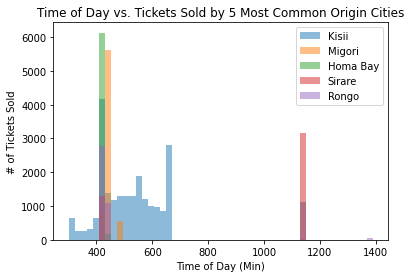

In [266]:
travel_time_data["travel_time_minutes"] = [time_to_minutes(time) for time in travel_time_data["travel_time"]]

og_to_ticks = {}

for og in origins:
    # Get all rides from og
    from_og = travel_time_data["travel_from"] == og
    og_to_ticks[og] = travel_time_data[from_og]["travel_time_minutes"]

# Create consistent number of bins
bins = np.histogram(np.hstack(tuple(og_to_ticks.values())), bins=50)[1]

for city in og_to_ticks:
    # Add each origin city to histogram
    plt.hist(og_to_ticks[city], bins=bins, alpha=0.5, label=city)

# Label up the chart
plt.xlabel("Time of Day (Min)")
plt.ylabel("# of Tickets Sold")
plt.title("Time of Day vs. Tickets Sold by 5 Most Common Origin Cities")
plt.legend()
plt.show()

<h4>Would be a good idea to eventually do this by percentage, since some cities overwhelmingly have more entries</h4>

# Date vs. Tickets Sold Histogram

In [216]:
date_traffic_data = traffic_data.copy()
date_traffic_data['count'] = date_traffic_data.groupby('travel_date')['travel_date'].transform('count')
date_traffic_data["travel_date"] = [datetime.strptime(entry, "%d-%m-%y") for entry in date_traffic_data["travel_date"]]
date_traffic_data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,count
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,305
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,305
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,355
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,355
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,355
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,355


In [217]:
holidays = pd.DataFrame.from_dict({
    "26-10-17": "Public Holiday",
    "12-12-17": "Jamhuri Day",
    "25-12-17": "Christmas Day",
    "26-12-17": "Boxing Day",
    "01-01-18": "New Year's Day",
    "30-03-18": "Good Friday",
    "02-04-18": "Easter Monday"
}, orient="index", columns=["holiday"])

holidays.index = [datetime.strptime(i, "%d-%m-%y") for i in holidays.index]
holidays

,holiday
2017-10-26,Public Holiday
2017-12-12,Jamhuri Day
2017-12-25,Christmas Day
2017-12-26,Boxing Day
2018-01-01,New Year's Day
2018-03-30,Good Friday
2018-04-02,Easter Monday


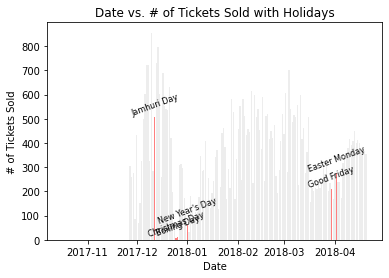

In [218]:
values = date_traffic_data.drop_duplicates(subset=["travel_date"])
values.set_index("travel_date", inplace=True)
values = pd.concat([values, holidays], axis=1)
colors = ["r" if not pd.isna(elem) else "gainsboro" for elem in values["holiday"]]
labels = [elem if not pd.isna(elem) else "" for elem in values["holiday"]]

x = values.index
y = values["count"]

bar = plt.bar(x, y, color=colors, alpha=0.5)
plt.xlabel("Date")
plt.ylabel("# of Tickets Sold")
plt.title("Date vs. # of Tickets Sold with Holidays")
plt.bar_label(bar, labels=labels, rotation="20", fontsize=8)
plt.show()

# Exploration of Vehicle Type

In [219]:
vehicle_type_data = traffic_data.copy()

In [220]:
dests = list(vehicle_type_data["travel_from"].drop_duplicates())
dest_data = pd.DataFrame(0, index=dests, columns=["Bus", "Shuttle"])
dests

['Migori',
 'Keroka',
 'Homa Bay',
 'Kisii',
 'Keumbu',
 'Rongo',
 'Kijauri',
 'Oyugis',
 'Awendo',
 'Sirare',
 'Nyachenge',
 'Kehancha',
 'Kendu Bay',
 'Sori',
 'Rodi',
 'Mbita',
 'Ndhiwa']

In [221]:
# Associate origin city with vehicle type
for i, row in vehicle_type_data.iterrows():
    origin = row["travel_from"]
    car_type = row["car_type"].title()
    
    dest_data.loc[origin, car_type] += 1
    

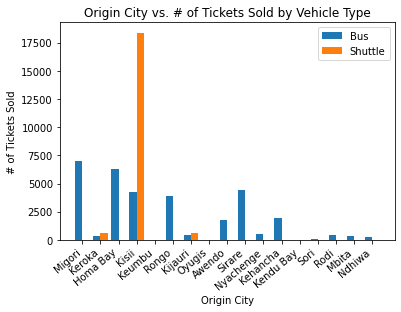

In [222]:
X_axis = np.arange(len(dests))

# Plot buses and shuttle counts
plt.bar(X_axis - 0.2, dest_data.Bus, 0.4, label="Bus")
plt.bar(X_axis + 0.2, dest_data.Shuttle, 0.4, label="Shuttle")
plt.xticks(X_axis, dests, rotation=40, ha="right")
plt.legend()
plt.xlabel("Origin City")
plt.ylabel("# of Tickets Sold")
plt.title("Origin City vs. # of Tickets Sold by Vehicle Type")
plt.show()

# Exploration of Ride ID

In [223]:
id_traffic_data = traffic_data.copy()

In [224]:
ride_id = id_traffic_data["ride_id"]
print(f"There are {len(ride_id)} tickets")
print(f"There are {len(set(ride_id))} rides")

There are 51645 tickets
There are 6249 rides


In [225]:
id_traffic_data.drop_duplicates(subset="ride_id", inplace=True)
id_traffic_data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51575,13812,2B,Mpesa,FSAA2XB4WX,20-04-18,23:10,Ndhiwa,Nairobi,Bus,49
51605,13813,14B,Mpesa,TSOPCEGOKH,20-04-18,7:05,Ndhiwa,Nairobi,Bus,49
51639,13825,24A,Mpesa,B3R9XWCV9O,20-04-18,7:09,Rongo,Nairobi,Bus,49
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49


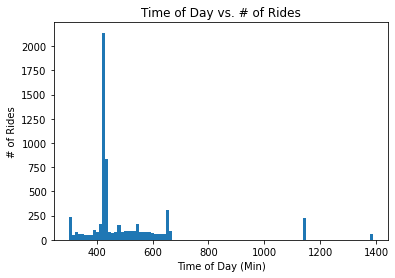

In [226]:
id_traffic_data["time_in_minutes"] = [time_to_minutes(entry) for entry in id_traffic_data.travel_time]

plt.hist(id_traffic_data["time_in_minutes"], bins=100)
plt.xlabel("Time of Day (Min)")
plt.ylabel("# of Rides")
plt.title("Time of Day vs. # of Rides")
plt.show()

<h4>Looks like the graph looks more or less the same between rides and tickets sold</h4>

# How much is the capacity of buses/shuttles used?

In [227]:
cap_traffic_data = traffic_data.copy()

In [228]:
def get_percent(row):
    return row["count"] / row["max_capacity"]

In [229]:
# Split into bus and shuttle data
bus_data = cap_traffic_data[cap_traffic_data.car_type == "Bus"].copy()
shuttle_data = cap_traffic_data[cap_traffic_data.car_type == "shuttle"].copy()

for df in [bus_data, shuttle_data]:
    # Get tickets sold per ride
    df['count'] = df.groupby('ride_id')['ride_id'].transform('count')

    # Get just the rides
    df.drop_duplicates(subset="ride_id", inplace=True)

    # Create column for % capacity used
    df["%_capacity"] = df.apply(get_percent, axis=1)

bus_data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,count,%_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1,0.020408
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1,0.020408
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1,0.020408
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5,0.102041
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31,0.632653
...,...,...,...,...,...,...,...,...,...,...,...,...
51575,13812,2B,Mpesa,FSAA2XB4WX,20-04-18,23:10,Ndhiwa,Nairobi,Bus,49,11,0.224490
51605,13813,14B,Mpesa,TSOPCEGOKH,20-04-18,7:05,Ndhiwa,Nairobi,Bus,49,11,0.224490
51639,13825,24A,Mpesa,B3R9XWCV9O,20-04-18,7:09,Rongo,Nairobi,Bus,49,1,0.020408
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49,1,0.020408


In [230]:
bus_stats = bus_data["%_capacity"]
bus_stats.describe()

count    3189.000000
mean        0.204690
std         0.227055
min         0.020408
25%         0.040816
50%         0.102041
75%         0.285714
max         1.020408
Name: %_capacity, dtype: float64

In [231]:
shuttle_stats = shuttle_data["%_capacity"]
shuttle_stats.describe()

count    3060.000000
mean        0.584076
std         0.370262
min         0.090909
25%         0.181818
50%         0.727273
75%         0.909091
max         1.090909
Name: %_capacity, dtype: float64

In [232]:
bus_data[bus_data["%_capacity"] > 1]

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,count,%_capacity
14020,8454,18A,Mpesa,RPOXVAJVME,09-01-18,7:00,Sirare,Nairobi,Bus,49,50,1.020408


In [233]:
traffic_data[traffic_data["ride_id"] == 8545].sort_values(by="seat_number")

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
14689,8545,10A,Mpesa,1T8TTTXQPR,11-01-18,7:00,Sirare,Nairobi,Bus,49
14653,8545,10B,Mpesa,R5B9ZMVPQW,11-01-18,7:00,Sirare,Nairobi,Bus,49
14647,8545,11A,Mpesa,KHY2D4XCX9,11-01-18,7:00,Sirare,Nairobi,Bus,49
14719,8545,11B,Mpesa,PUMZPS5KHA,11-01-18,7:00,Sirare,Nairobi,Bus,49
14648,8545,12A,Mpesa,9JPKOYZTX6,11-01-18,7:00,Sirare,Nairobi,Bus,49
14654,8545,12B,Mpesa,MORXLDKIFJ,11-01-18,7:00,Sirare,Nairobi,Bus,49
14672,8545,13A,Mpesa,PD4M87NK8J,11-01-18,7:00,Sirare,Nairobi,Bus,49
14708,8545,13B,Mpesa,QNC8V30UD3,11-01-18,7:00,Sirare,Nairobi,Bus,49
14671,8545,14A,Mpesa,4CBCHSHOH3,11-01-18,7:00,Sirare,Nairobi,Bus,49
14677,8545,14B,Mpesa,8JUHVPUNSX,11-01-18,7:00,Sirare,Nairobi,Bus,49


In [234]:
shuttle_data[shuttle_data["%_capacity"] > 1]

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,count,%_capacity
11858,8124,10,Mpesa,0JV6LE7DLQ,13-02-18,7:00,Kisii,Nairobi,shuttle,11,12,1.090909
14549,8528,4,Mpesa,T90LXAJYRJ,07-02-18,9:30,Kisii,Nairobi,shuttle,11,12,1.090909
15438,8642,3,Mpesa,GKIMSEN6HI,05-02-18,10:30,Kisii,Nairobi,shuttle,11,12,1.090909
15506,8651,2,Mpesa,G2AXAAGT2G,05-02-18,9:10,Kisii,Nairobi,shuttle,11,12,1.090909
16382,8773,4,Mpesa,OMJWGXF3KR,04-02-18,10:51,Kisii,Nairobi,shuttle,11,12,1.090909
17846,9011,3,Mpesa,2S705PYUNW,31-01-18,9:50,Kisii,Nairobi,shuttle,11,12,1.090909
27920,10689,9,Mpesa,J3KWUYG5FQ,20-12-17,10:00,Kisii,Nairobi,shuttle,11,12,1.090909
29118,10847,1X,Mpesa,OG36YBKDOZ,19-12-17,7:20,Kisii,Nairobi,shuttle,11,12,1.090909
32321,11279,1X,Mpesa,TPHTQGQ2L9,14-12-17,10:57,Kisii,Nairobi,shuttle,11,12,1.090909
35200,11612,7,Mpesa,HONXUTCIAA,10-12-17,11:05,Kisii,Nairobi,shuttle,11,12,1.090909


<h4>Everything looks normal, and it looks shuttles tend to be more filled out than buses, which makes sense.  However, ride 8454 and a number of shuttles sold more tickets than their capacity</h4>

# Weekdays vs. Tickets Sold

In [238]:
wd_data = traffic_data.copy()

In [239]:
wd_data["travel_date"] = [datetime.strptime(entry, "%d-%m-%y") for entry in wd_data["travel_date"]]
wd_data["weekday"] = [date.weekday() for date in wd_data["travel_date"]]

wd_data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,weekday
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,6
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,6
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,0
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,0
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,4
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,4
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,4
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,4


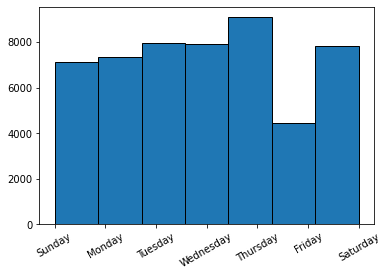

In [245]:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

plt.hist(wd_data.weekday, bins=7, edgecolor="black")
plt.xticks(range(7), labels=days, rotation="30")
plt.show()

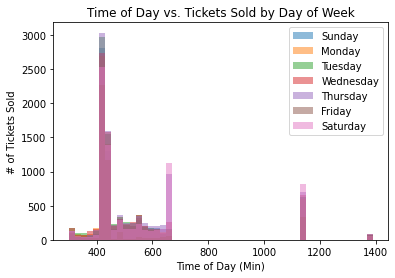

In [264]:
wd_data["travel_time_minutes"] = [time_to_minutes(time) for time in wd_data["travel_time"]]

wd_to_tickets = {}

for day in range(7):
    on_this_day = wd_data["weekday"] == day
    wd_to_tickets[day] = wd_data[on_this_day]["travel_time_minutes"]

# Create consistent number of bins
bins=np.histogram(np.hstack(tuple(wd_to_tickets.values())), bins=50)[1]

for tick, day in zip(wd_to_tickets, days):
    # Add each origin city to histogarm
    plt.hist(wd_to_tickets[tick], bins=bins, alpha=0.5, label=day)
    
# Label up the chart
plt.xlabel("Time of Day (Min)")
plt.ylabel("# of Tickets Sold")
plt.title(f"Time of Day vs. Tickets Sold by Day of Week")
plt.legend()
plt.show()
